In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data_train = pd.read_csv('adctrain.csv')
data_test=pd.read_csv('adctest.csv')


In [3]:
data_train.head()

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again
0,8236617,DEFAULT,Promotions,03 fardeaux Ifri + 1 offert,30,480,14400,43650,200200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1
1,8236617,DEFAULT,Promotions,3 fardeaux coca achetes = 1 fardeau offert,15,1800,27000,43650,200200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1
2,8236617,DEFAULT,Promotions,Snickers mini cube 200g,5,450,2250,43650,200200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1
3,8236624,COMPLETED,Paves,Pave chocolat,3,100,300,1460,700700,CARD_PAY,6359544.0,17654385,2021-01-01 00:27:29,Algeria,1
4,8236624,COMPLETED,Tartes,Tarte citron,3,100,300,1460,700700,CARD_PAY,6359544.0,17654385,2021-01-01 00:27:29,Algeria,1


In [4]:
data_test.head()

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country
0,8236741,COMPLETED,Chocolat,NUTELLA 750g,2,1390,2780,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria
1,8236741,COMPLETED,Chocolat,MILKA chocolat extra cacao 100g,1,210,210,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria
2,8236741,COMPLETED,Chocolat,MILKA strawberry 100g,1,210,210,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria
3,8236741,COMPLETED,Chocolat,LINDT les grandes noisette,1,900,900,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria
4,8236741,COMPLETED,Boisson,IFRI eau minerale 1.5l x 6,2,170,340,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria


In [5]:
data_train.shape

(17761, 15)

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17761 entries, 0 to 17760
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          17761 non-null  int64  
 1   Order Status      17761 non-null  object 
 2   Category Name     9093 non-null   object 
 3   Product Name      17761 non-null  object 
 4   Quantity          17761 non-null  int64  
 5   Unit Price        17761 non-null  object 
 6   Total Price       17761 non-null  object 
 7   Sub Total         17245 non-null  object 
 8   Delivery Charge   17731 non-null  object 
 9   Payment Method    17326 non-null  object 
 10  Customer ID       17263 non-null  float64
 11  Merchant          17761 non-null  int64  
 12  Order Time        17761 non-null  object 
 13  Customer Country  17714 non-null  object 
 14  Purchase Again    17761 non-null  int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 2.0+ MB


In [7]:
data_train.describe()

,Order ID,Quantity,Customer ID,Merchant,Purchase Again
count,1.776100e+04,17761.000000,1.726300e+04,1.776100e+04,17761.000000
mean,2.893365e+11,2.082822,5.637509e+09,1.018583e+09,0.448905
std,2.048232e+12,3.523515,4.618781e+10,1.325224e+11,0.497396
min,8.236617e+06,1.000000,1.629574e+06,6.158523e+06,0.000000
25%,1.901861e+09,1.000000,6.258220e+06,7.149870e+06,0.000000
50%,3.126940e+09,1.000000,7.821300e+06,8.065701e+06,0.000000
75%,7.613038e+09,2.000000,2.819531e+09,2.325553e+07,1.000000
max,1.021310e+14,200.000000,1.292000e+12,1.766100e+13,1.000000


In [8]:
missing_rate_train = data_train.isnull().sum()/data_train.shape[0] * 100
missing_rate_train

Order ID             0.000000
Order Status         0.000000
Category Name       48.803558
Product Name         0.000000
Quantity             0.000000
Unit Price           0.000000
Total Price          0.000000
Sub Total            2.905242
Delivery Charge      0.168909
Payment Method       2.449186
Customer ID          2.803896
Merchant             0.000000
Order Time           0.000000
Customer Country     0.264625
Purchase Again       0.000000
dtype: float64

In [9]:
missing_rate_test = data_train.isnull().sum()/data_train.shape[0] * 100
missing_rate_test

Order ID             0.000000
Order Status         0.000000
Category Name       48.803558
Product Name         0.000000
Quantity             0.000000
Unit Price           0.000000
Total Price          0.000000
Sub Total            2.905242
Delivery Charge      0.168909
Payment Method       2.449186
Customer ID          2.803896
Merchant             0.000000
Order Time           0.000000
Customer Country     0.264625
Purchase Again       0.000000
dtype: float64

In [10]:
data_test.shape

(12013, 14)

In [11]:
data_train["Order Status"].value_counts()

COMPLETED      14699
REJECTED        1769
ACCEPTED         665
CANCELLED        350
DEFAULT          195
SEND_TO_TMS       83
Name: Order Status, dtype: int64

In [12]:
data_test["Order Status"].value_counts()

COMPLETED      9776
REJECTED       1372
ACCEPTED        631
CANCELLED       145
DEFAULT          53
SEND_TO_TMS      36
Name: Order Status, dtype: int64

In [13]:
data_train["Payment Method"].value_counts()

CARD_PAY    12092
CASH_PAY     4717
CASH          495
0              22
Name: Payment Method, dtype: int64

In [14]:
data_test["Payment Method"].value_counts()

CARD_PAY    8271
CASH_PAY    3337
CASH         304
Name: Payment Method, dtype: int64

In [15]:
data_train["Purchase Again"].value_counts()/data_train.shape[0]*100

0    55.10951
1    44.89049
Name: Purchase Again, dtype: float64

In [16]:
data_train["Customer Country"].value_counts()/data_train.shape[0]*100

Algeria           97.989978
France             1.418839
Canada             0.112606
United States      0.101346
United Kingdom     0.095715
Sweden             0.016891
Name: Customer Country, dtype: float64

In [17]:
data_train['Merchant'].value_counts().shape[0]

55

In [18]:
valeurs_merchant = data_train.Merchant.unique()
a = []
for i in valeurs_merchant : 
    my_merchant = data_train.loc[data_train["Merchant"] == i]
    b = len(my_merchant[my_merchant["Purchase Again"] == 1])/len(my_merchant["Purchase Again"])
    a.append(b)
taux_per_merchant = []
for j in data_train["Merchant"] : 
    for i in range(55): 
        if j == valeurs_merchant[i] : 
            taux_per_merchant.append(a[i])
len(taux_per_merchant )

17761

In [19]:
data_train['taux_per_merchant'] = taux_per_merchant

In [20]:
data_train['Delivery Charge'] = pd.to_numeric(data_train['Delivery Charge'], errors='coerce')
data_train['Delivery Charge'].isnull().sum()


80

In [21]:
data_test['Delivery Charge'] = pd.to_numeric(data_test['Delivery Charge'], errors='coerce')
data_test['Delivery Charge'].isnull().sum()

5

In [22]:
data_train["Delivery Charge"] = data_train["Delivery Charge"].fillna(0)
data_train["Delivery Charge"] = data_train["Delivery Charge"].astype(np.int64)
data_train['Delivery Charge'].isnull().sum()

0

In [23]:
data_test["Delivery Charge"] = data_test["Delivery Charge"].fillna(0)
data_test["Delivery Charge"] = data_test["Delivery Charge"].astype(np.int64)
data_test['Delivery Charge'].isnull().sum()

0

In [24]:
data_train["Delivery Charge 2"] = data_train["Delivery Charge"].apply(lambda x : int(len(str(x))/2))
delivery = []
for i in range(data_train.shape[0]):
    delivery.append(str(data_train["Delivery Charge"].iloc[i])[:int(data_train["Delivery Charge 2"].iloc[i])])

In [25]:
data_train['Delivery Charge'] = delivery

In [26]:
data_train.head()

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again,taux_per_merchant,Delivery Charge 2
0,8236617,DEFAULT,Promotions,03 fardeaux Ifri + 1 offert,30,480,14400,43650,200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1,0.316606,3
1,8236617,DEFAULT,Promotions,3 fardeaux coca achetes = 1 fardeau offert,15,1800,27000,43650,200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1,0.316606,3
2,8236617,DEFAULT,Promotions,Snickers mini cube 200g,5,450,2250,43650,200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1,0.316606,3
3,8236624,COMPLETED,Paves,Pave chocolat,3,100,300,1460,700,CARD_PAY,6359544.0,17654385,2021-01-01 00:27:29,Algeria,1,0.464286,3
4,8236624,COMPLETED,Tartes,Tarte citron,3,100,300,1460,700,CARD_PAY,6359544.0,17654385,2021-01-01 00:27:29,Algeria,1,0.464286,3


In [27]:
data_test["Delivery Charge 2"] = data_test["Delivery Charge"].apply(lambda x : int(len(str(x))/2))
delivery = []
for i in range(data_test.shape[0]):
    delivery.append(str(data_test["Delivery Charge"].iloc[i])[:int(data_test["Delivery Charge 2"].iloc[i])])

In [28]:
data_test['Delivery Charge'] = delivery

In [29]:
data_test.head()

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Delivery Charge 2
0,8236741,COMPLETED,Chocolat,NUTELLA 750g,2,1390,2780,4740,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,3
1,8236741,COMPLETED,Chocolat,MILKA chocolat extra cacao 100g,1,210,210,4740,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,3
2,8236741,COMPLETED,Chocolat,MILKA strawberry 100g,1,210,210,4740,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,3
3,8236741,COMPLETED,Chocolat,LINDT les grandes noisette,1,900,900,4740,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,3
4,8236741,COMPLETED,Boisson,IFRI eau minerale 1.5l x 6,2,170,340,4740,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,3


In [30]:
data_train["Delivery Charge"] = data_train["Delivery Charge"].replace({'':data_train["Delivery Charge"].mode()[0]})

In [31]:
print(len(data_train[data_train["Payment Method"]== '0']))
data_train["Payment Method"].isnull().sum()

22


435

In [32]:
data_train['Payment Method'].fillna(data_train['Payment Method'].mode()[0], inplace = True)
data_train['Payment Method'] = data_train['Payment Method'].replace({'0':'CARD_PAY'})
data_train['Payment Method'].value_counts()

CARD_PAY    12549
CASH_PAY     4717
CASH          495
Name: Payment Method, dtype: int64

In [33]:
data_train['Payment Method'] = data_train['Payment Method'].replace({'CASH':'CASH_PAY'})
data_train['Payment Method'].value_counts()

CARD_PAY    12549
CASH_PAY     5212
Name: Payment Method, dtype: int64

In [34]:
data_train['Unit Price'] = pd.to_numeric(data_train['Unit Price'], errors='coerce')
data_train['Total Price'] = pd.to_numeric(data_train['Total Price'], errors='coerce')
data_train['Sub Total'] = pd.to_numeric(data_train['Sub Total'], errors='coerce')

In [35]:
data_train["Total Price"].fillna(data_train["Unit Price"]*data_train["Quantity"],inplace = True)
data_train["Unit Price"].fillna(data_train["Total Price"]/data_train["Quantity"],inplace = True)

In [36]:
data_train["Unit Price"].fillna(data_train["Unit Price"].mean(),inplace = True)

In [37]:
data_train["Total Price"].fillna(data_train["Unit Price"]*data_train["Quantity"],inplace = True)

In [38]:
print(data_train["Total Price"].isnull().sum())
print(data_train["Unit Price"].isnull().sum())

0
0


In [39]:
data_test["Delivery Charge"] = data_test["Delivery Charge"].replace({'':data_test["Delivery Charge"].mode()[0]})

In [40]:
print(len(data_test[data_test["Payment Method"]== '0']))
data_test["Payment Method"].isnull().sum()

0


101

In [41]:
data_test['Payment Method'].fillna(data_test['Payment Method'].mode()[0], inplace = True)
data_test['Payment Method'] = data_test['Payment Method'].replace({'0':'CARD_PAY'})
data_test['Payment Method'].value_counts()

CARD_PAY    8372
CASH_PAY    3337
CASH         304
Name: Payment Method, dtype: int64

In [42]:
data_test['Payment Method'] = data_test['Payment Method'].replace({'CASH':'CASH_PAY'})
data_test['Payment Method'].value_counts()

CARD_PAY    8372
CASH_PAY    3641
Name: Payment Method, dtype: int64

In [43]:
data_test['Unit Price'] = pd.to_numeric(data_test['Unit Price'], errors='coerce')
data_test['Total Price'] = pd.to_numeric(data_test['Total Price'], errors='coerce')
data_test['Sub Total'] = pd.to_numeric(data_test['Sub Total'], errors='coerce')

In [44]:
data_test["Total Price"].fillna(data_test["Unit Price"]*data_test["Quantity"],inplace = True)
data_test["Unit Price"].fillna(data_test["Total Price"]/data_test["Quantity"],inplace = True)

In [45]:
data_test["Unit Price"].fillna(data_test["Unit Price"].mean(),inplace = True)

In [46]:
data_test["Total Price"].fillna(data_test["Unit Price"]*data_test["Quantity"],inplace = True)

In [47]:
print(data_test["Total Price"].isnull().sum())
print(data_test["Unit Price"].isnull().sum())

0
0


In [48]:
order_id_train = data_train["Order ID"].unique()
aa_train=[]
for i in order_id_train : 
    aa_train.append(data_train.loc[data_train["Order ID"] == i,'Total Price'].sum())

In [49]:
print(len(aa_train))
print(len(order_id_train))

2212
2212


In [50]:
order_id_test = data_test["Order ID"].unique()
aa_test=[]
for i in order_id_test : 
    aa_test.append(data_test.loc[data_test["Order ID"] == i,'Total Price'].sum())

In [51]:
print(len(aa_test))
print(len(order_id_test))

1442
1442


In [52]:
data_train['Customer Country'].fillna(data_train['Customer Country'].mode()[0], inplace = True)
data_train['Customer Country'].isnull().sum()

0

In [53]:
vide = np.nan
data_train["test"] = vide

In [54]:
data_test['Customer Country'].fillna(data_test['Customer Country'].mode()[0], inplace = True)
data_test['Customer Country'].isnull().sum()

0

In [55]:
vide = np.nan
data_test["test"] = vide

In [56]:
d = []
for i in data_train["Order ID"] : 
    for j in range(len(order_id_train)) : 
        if i == order_id_train[j] : 
            d.append(aa_train[j])

In [57]:
len(d)

17761

In [58]:
data_train["test"] = d

In [59]:
data_train["Sub Total"].fillna(data_train["test"],inplace = True)

In [60]:
data_train["Sub Total"].isnull().sum()

0

In [61]:
d = []
for i in data_test["Order ID"] : 
    for j in range(len(order_id_test)) : 
        if i == order_id_test[j] : 
            d.append(aa_test[j])

In [62]:
len(d)

12013

In [63]:
data_test["test"] = d

In [64]:
data_test["Sub Total"].fillna(data_test["test"],inplace = True)

In [65]:
data_test["Sub Total"].isnull().sum()

0

In [66]:
data_train["Order Time"] = pd.to_datetime(data_train["Order Time"])
e = []
for i in range(data_train.shape[0]) : 
    e.append(data_train["Order Time"][i].hour)
e = pd.Series(e)
f = []
for i in range(data_train.shape[0]) : 
    if  6 <= e[i] < 12 : 
        f.append('matin')
    elif  12 <= e[i] < 19 : 
        f.append('après-midi')
    elif  19 <= e[i] <= 23: 
        f.append('nuit')
    elif  0 <= e[i] <= 5 : 
        f.append('nuit')

In [67]:
data_train["jour"] = f

In [68]:
data_train.head()

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again,taux_per_merchant,Delivery Charge 2,test,jour
0,8236617,DEFAULT,Promotions,03 fardeaux Ifri + 1 offert,30,480.0,14400.0,43650.0,200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1,0.316606,3,43650.0,nuit
1,8236617,DEFAULT,Promotions,3 fardeaux coca achetes = 1 fardeau offert,15,1800.0,27000.0,43650.0,200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1,0.316606,3,43650.0,nuit
2,8236617,DEFAULT,Promotions,Snickers mini cube 200g,5,450.0,2250.0,43650.0,200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1,0.316606,3,43650.0,nuit
3,8236624,COMPLETED,Paves,Pave chocolat,3,100.0,300.0,1460.0,700,CARD_PAY,6359544.0,17654385,2021-01-01 00:27:29,Algeria,1,0.464286,3,1460.0,nuit
4,8236624,COMPLETED,Tartes,Tarte citron,3,100.0,300.0,1460.0,700,CARD_PAY,6359544.0,17654385,2021-01-01 00:27:29,Algeria,1,0.464286,3,1460.0,nuit


In [69]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17761 entries, 0 to 17760
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           17761 non-null  int64         
 1   Order Status       17761 non-null  object        
 2   Category Name      9093 non-null   object        
 3   Product Name       17761 non-null  object        
 4   Quantity           17761 non-null  int64         
 5   Unit Price         17761 non-null  float64       
 6   Total Price        17761 non-null  float64       
 7   Sub Total          17761 non-null  float64       
 8   Delivery Charge    17761 non-null  object        
 9   Payment Method     17761 non-null  object        
 10  Customer ID        17263 non-null  float64       
 11  Merchant           17761 non-null  int64         
 12  Order Time         17761 non-null  datetime64[ns]
 13  Customer Country   17761 non-null  object        
 14  Purcha

In [70]:
data_test["Order Time"] = pd.to_datetime(data_test["Order Time"])
e = []
for i in range(data_test.shape[0]) : 
    e.append(data_test["Order Time"][i].hour)
e = pd.Series(e)
f = []
for i in range(data_test.shape[0]) : 
    if  6 <= e[i] < 12 : 
        f.append('matin')
    elif  12 <= e[i] < 19 : 
        f.append('après-midi')
    elif  19 <= e[i] <= 23: 
        f.append('nuit')
    elif  0 <= e[i] <= 5 : 
        f.append('nuit')

In [71]:
data_test["jour"] = f

In [72]:
data_test.head(n=100)

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Delivery Charge 2,test,jour
0,8236741,COMPLETED,Chocolat,NUTELLA 750g,2,1390.0,2780.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,3,4740.0,nuit
1,8236741,COMPLETED,Chocolat,MILKA chocolat extra cacao 100g,1,210.0,210.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,3,4740.0,nuit
2,8236741,COMPLETED,Chocolat,MILKA strawberry 100g,1,210.0,210.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,3,4740.0,nuit
3,8236741,COMPLETED,Chocolat,LINDT les grandes noisette,1,900.0,900.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,3,4740.0,nuit
4,8236741,COMPLETED,Boisson,IFRI eau minerale 1.5l x 6,2,170.0,340.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,3,4740.0,nuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8242031,COMPLETED,Fruits secs,DK KHEYAR noix decortiquees 250g,1,475.0,475.0,31255.0,200,CASH_PAY,6429006.0,6158523,2021-01-01 10:41:15,Algeria,3,31255.0,matin
96,8242031,COMPLETED,Fruits secs,DK KHEYAR cacahouÃ¨tes salees 250g,2,140.0,280.0,31255.0,200,CASH_PAY,6429006.0,6158523,2021-01-01 10:41:15,Algeria,3,31255.0,matin
97,8242031,COMPLETED,Petit-dejeuner,NESTLE Chocapic cereales 375gr,5,825.0,4125.0,31255.0,200,CASH_PAY,6429006.0,6158523,2021-01-01 10:41:15,Algeria,3,31255.0,matin
98,8242031,COMPLETED,Pates et riz,PANZANI cannelloni 250g,4,175.0,700.0,31255.0,200,CASH_PAY,6429006.0,6158523,2021-01-01 10:41:15,Algeria,3,31255.0,matin


In [73]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12013 entries, 0 to 12012
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           12013 non-null  int64         
 1   Order Status       12013 non-null  object        
 2   Category Name      5999 non-null   object        
 3   Product Name       12013 non-null  object        
 4   Quantity           12013 non-null  int64         
 5   Unit Price         12013 non-null  float64       
 6   Total Price        12013 non-null  float64       
 7   Sub Total          12013 non-null  float64       
 8   Delivery Charge    12013 non-null  object        
 9   Payment Method     12013 non-null  object        
 10  Customer ID        12013 non-null  float64       
 11  Merchant           12013 non-null  int64         
 12  Order Time         12013 non-null  datetime64[ns]
 13  Customer Country   12013 non-null  object        
 14  Delive

In [74]:
print(len(data_train["Customer ID"].value_counts()))
print(len(data_train["Order ID"].value_counts()))
print(len(data_train["Order Time"].value_counts()))

999
2212
2208


In [75]:
print(len(data_test["Customer ID"].value_counts()))
print(len(data_test["Order ID"].value_counts()))
print(len(data_test["Order Time"].value_counts()))

767
1442
1441


In [76]:
data_train = data_train.drop('Order ID',axis = 1)

In [77]:
data_train = data_train.drop('Product Name',axis = 1)
data_train = data_train.drop('Category Name',axis = 1)
data_train = data_train.drop('Customer ID',axis = 1)
data_train= data_train.drop('Delivery Charge 2',axis = 1)
data_train = data_train.drop('test',axis = 1)

In [78]:
data_test = data_test.drop('Product Name',axis = 1)
data_test = data_test.drop('Category Name',axis = 1)
data_test= data_test.drop('Delivery Charge 2',axis = 1)
data_test = data_test.drop('test',axis = 1)

In [79]:
data_test.head(n=100)

,Order ID,Order Status,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,jour
0,8236741,COMPLETED,2,1390.0,2780.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,nuit
1,8236741,COMPLETED,1,210.0,210.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,nuit
2,8236741,COMPLETED,1,210.0,210.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,nuit
3,8236741,COMPLETED,1,900.0,900.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,nuit
4,8236741,COMPLETED,2,170.0,340.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,nuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8242031,COMPLETED,1,475.0,475.0,31255.0,200,CASH_PAY,6429006.0,6158523,2021-01-01 10:41:15,Algeria,matin
96,8242031,COMPLETED,2,140.0,280.0,31255.0,200,CASH_PAY,6429006.0,6158523,2021-01-01 10:41:15,Algeria,matin
97,8242031,COMPLETED,5,825.0,4125.0,31255.0,200,CASH_PAY,6429006.0,6158523,2021-01-01 10:41:15,Algeria,matin
98,8242031,COMPLETED,4,175.0,700.0,31255.0,200,CASH_PAY,6429006.0,6158523,2021-01-01 10:41:15,Algeria,matin


In [80]:
data_train.head()

,Order Status,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Merchant,Order Time,Customer Country,Purchase Again,taux_per_merchant,jour
0,DEFAULT,30,480.0,14400.0,43650.0,200,CASH_PAY,6158523,2021-01-01 00:26:48,Algeria,1,0.316606,nuit
1,DEFAULT,15,1800.0,27000.0,43650.0,200,CASH_PAY,6158523,2021-01-01 00:26:48,Algeria,1,0.316606,nuit
2,DEFAULT,5,450.0,2250.0,43650.0,200,CASH_PAY,6158523,2021-01-01 00:26:48,Algeria,1,0.316606,nuit
3,COMPLETED,3,100.0,300.0,1460.0,700,CARD_PAY,17654385,2021-01-01 00:27:29,Algeria,1,0.464286,nuit
4,COMPLETED,3,100.0,300.0,1460.0,700,CARD_PAY,17654385,2021-01-01 00:27:29,Algeria,1,0.464286,nuit


<AxesSubplot:>

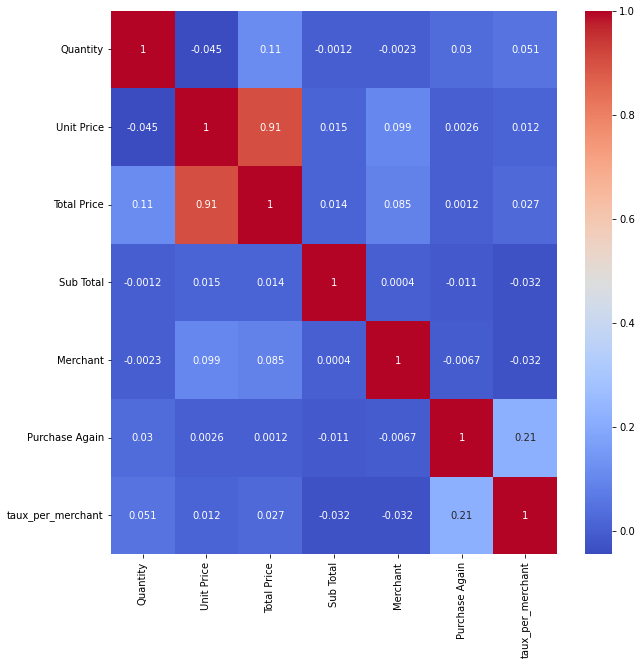

In [81]:
plt.figure(figsize = (10,10))
sns.heatmap(data_train.corr(),annot = True,cmap='coolwarm')

In [82]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data1 = data_train.apply(LabelEncoder().fit_transform)
data1.head(n=2)

,Order Status,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Merchant,Order Time,Customer Country,Purchase Again,taux_per_merchant,jour
0,3,22,202,676,1112,31,1,0,0,0,1,6,2
1,3,13,347,696,1112,31,1,0,0,0,1,6,2


In [83]:
data2 = data_test.apply(LabelEncoder().fit_transform)
data2.head(n=2)

,Order ID,Order Status,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,jour
0,0,2,1,281,481,415,48,0,524,2,0,0,2
1,0,2,0,97,115,415,48,0,524,2,0,0,2


<AxesSubplot:>

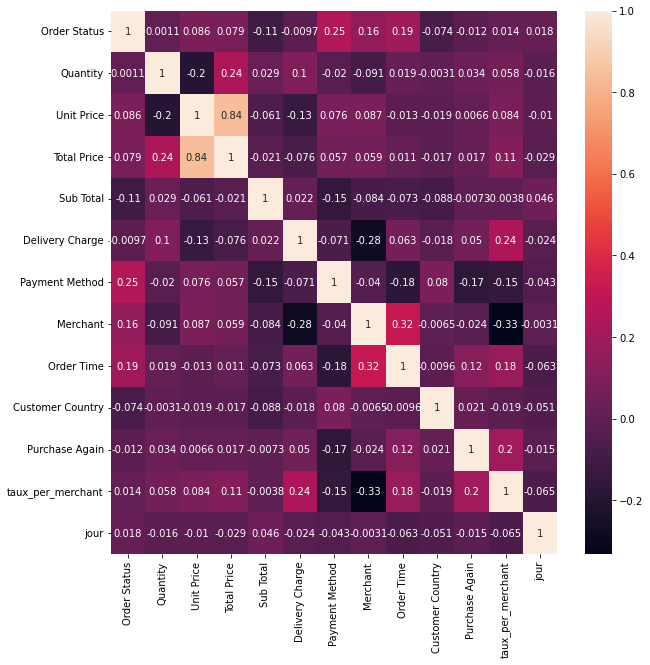

In [84]:
plt.figure(figsize = (10,10))
sns.heatmap(data1.corr(),annot = True)

In [85]:
X = data1.drop('Purchase Again',axis = 1)
y = data1["Purchase Again"]

In [86]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 40)

In [87]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [88]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

60.54 %


C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

print(round(acc_sgd,2,), "%")

55.23 %


In [90]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [91]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

60.54 %


C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

95.26 %


In [93]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

61.54 %


In [94]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

55.26 %


C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


55.29 %
100.0 %


C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [95]:
# Comparing models

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
95.26,KNN
61.54,Naive Bayes
60.54,Logistic Regression
55.29,Support Vector Machines
55.26,Perceptron
55.23,Stochastic Gradient Decent


<AxesSubplot:xlabel='feature'>

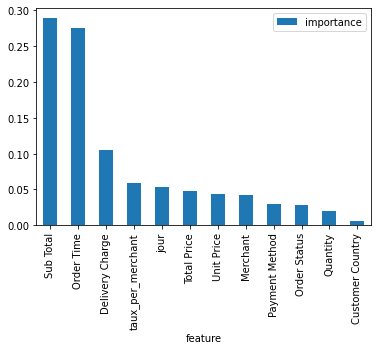

In [96]:
# Features importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.plot.bar()

In [97]:
data_test

,Order ID,Order Status,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,jour
0,8236741,COMPLETED,2,1390.0,2780.0,4740.0,550,CARD_PAY,8.392444e+06,7225386,2021-01-01 00:40:42,Algeria,nuit
1,8236741,COMPLETED,1,210.0,210.0,4740.0,550,CARD_PAY,8.392444e+06,7225386,2021-01-01 00:40:42,Algeria,nuit
2,8236741,COMPLETED,1,210.0,210.0,4740.0,550,CARD_PAY,8.392444e+06,7225386,2021-01-01 00:40:42,Algeria,nuit
3,8236741,COMPLETED,1,900.0,900.0,4740.0,550,CARD_PAY,8.392444e+06,7225386,2021-01-01 00:40:42,Algeria,nuit
4,8236741,COMPLETED,2,170.0,340.0,4740.0,550,CARD_PAY,8.392444e+06,7225386,2021-01-01 00:40:42,Algeria,nuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12008,1395694909,REJECTED,5,600.0,3000.0,3000.0,200,CASH_PAY,4.949852e+06,23255526,2021-02-14 18:55:23,Algeria,après-midi
12009,3266630982,COMPLETED,1,220.0,220.0,1100.0,200,CARD_PAY,6.313937e+09,10586352,2021-02-14 20:43:24,Algeria,nuit
12010,3266630982,COMPLETED,4,220.0,880.0,1100.0,200,CARD_PAY,6.313937e+09,10586352,2021-02-14 20:43:24,Algeria,nuit
12011,14338798234,REJECTED,1,5150.0,5150.0,5150.0,200,CASH_PAY,7.734230e+06,14700945,2021-02-14 22:06:49,Algeria,nuit


In [98]:
data_test2 = data_test
data_test2.head()

,Order ID,Order Status,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,jour
0,8236741,COMPLETED,2,1390.0,2780.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,nuit
1,8236741,COMPLETED,1,210.0,210.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,nuit
2,8236741,COMPLETED,1,210.0,210.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,nuit
3,8236741,COMPLETED,1,900.0,900.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,nuit
4,8236741,COMPLETED,2,170.0,340.0,4740.0,550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria,nuit


In [99]:
data2 = data2.drop('Customer ID',axis = 1)
data2 = data2.drop('Order ID',axis = 1)
data2.head()

,Order Status,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Merchant,Order Time,Customer Country,jour
0,2,1,281,481,415,48,0,2,0,0,2
1,2,0,97,115,415,48,0,2,0,0,2
2,2,0,97,115,415,48,0,2,0,0,2
3,2,0,246,308,415,48,0,2,0,0,2
4,2,1,81,165,415,48,0,2,0,0,2


In [100]:
taux_per_merchant=[]
for j in data2["Merchant"] : 
    c=0
    for i in range(55): 
        if j == valeurs_merchant[i] : 
            taux_per_merchant.append(a[i])
            c=1 
    if c==0 : 
        taux_per_merchant.append(1)
len(taux_per_merchant )

12013

In [101]:
data2['taux_per_merchant'] = taux_per_merchant

In [102]:
jour = data2['jour']
data2 = data2.drop('jour',axis = 1)
data2['jour'] = jour

In [103]:
data2.head()

,Order Status,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Merchant,Order Time,Customer Country,taux_per_merchant,jour
0,2,1,281,481,415,48,0,2,0,0,1,2
1,2,0,97,115,415,48,0,2,0,0,1,2
2,2,0,97,115,415,48,0,2,0,0,1,2
3,2,0,246,308,415,48,0,2,0,0,1,2
4,2,1,81,165,415,48,0,2,0,0,1,2


In [104]:
# Create submission

Y_prediction = knn.predict(data2)

submission = pd.DataFrame({
        "Customer": data_test["Customer ID"],
        "Target": Y_prediction
    })

submission.to_csv("submission.csv", index=False)